In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def DetectOutlier(df,var):
 # IQR method is used to deal with outliers
 Q1 = df[var].quantile(0.25)
 Q3 = df[var].quantile(0.75)
 IQR = Q3 - Q1
 high, low = Q3+1.5*IQR, Q1-1.5*IQR

 print("Highest allowed in variable:", var, high)
 print("lowest allowed in variable:", var, low)
 count = df[(df[var] > high) | (df[var] < low)][var].count()
 print('Total outliers in:',var,':',count)
 # new dataframe is created which contains outliers
 df1 = df[((df[var] < low) | (df[var] > high))] #these are outliers
 print('Outliers : \n', len(df1))
 print(df1.T)
 df = df[((df[var] >= low) & (df[var] <= high))] #now filter out data which is not outlier
 return(df)

In [3]:
df = pd.read_csv('academic.csv')

In [4]:
# Display basic information
print('Information of Dataset:\n', df.info)
print('Shape of Dataset (row x column): ', df.shape)
print('Columns Name: ', df.columns)
print('Total elements in dataset:', df.size)
print('Datatype of attributes (columns):', df.dtypes)
print('First 5 rows:\n', df.head().T)
print('Last 5 rows:\n',df.tail().T)
print('Any 5 rows:\n',df.sample(5).T)


Information of Dataset:
 <bound method DataFrame.info of     gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
0           IT        F

In [6]:
# Display Statistical information
print('Statistical information of Numerical Columns: \n',df.describe().T)

Statistical information of Numerical Columns: 
                    count       mean        std  min   25%   50%   75%    max
raisedhands        478.0  46.939331  31.375699  0.0  15.0  50.0  75.0  170.0
VisITedResources   480.0  54.797917  33.080007  0.0  20.0  65.0  84.0   99.0
AnnouncementsView  480.0  37.918750  26.611244  0.0  14.0  33.0  58.0   98.0
Discussion         480.0  43.283333  27.637735  1.0  20.0  39.0  70.0   99.0


In [9]:
print('Total Number of Null Values in Dataset: \n', df.isna().sum().T)

Total Number of Null Values in Dataset: 
 gender                      2
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 2
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [10]:
# Fill the missing values
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['raisedhands'].fillna(df['raisedhands'].mean(), inplace=True)
print('Total Number of Null Values in Dataset: \n', df.isna().sum())

Total Number of Null Values in Dataset: 
 gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [11]:
# Converting categorical to numeric using Find and replace method
df['Relation']=df['Relation'].astype('category')
df['Relation']=df['Relation'].cat.codes

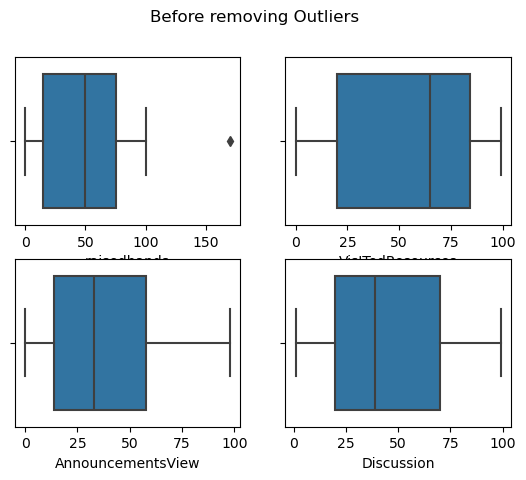

In [15]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Before removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
plt.show()

In [16]:
df = DetectOutlier(df, 'raisedhands')

Highest allowed in variable: raisedhands 165.0
lowest allowed in variable: raisedhands -75.0
Total outliers in: raisedhands : 1
Outliers : 
 1
                                    28
gender                               M
NationalITy                         KW
PlaceofBirth                    KuwaIT
StageID                   MiddleSchool
GradeID                           G-08
SectionID                            A
Topic                          Science
Semester                             F
Relation                             0
raisedhands                      170.0
VisITedResources                    85
AnnouncementsView                   52
Discussion                          43
ParentAnsweringSurvey              Yes
ParentschoolSatisfaction          Good
StudentAbsenceDays             Under-7
Class                                M


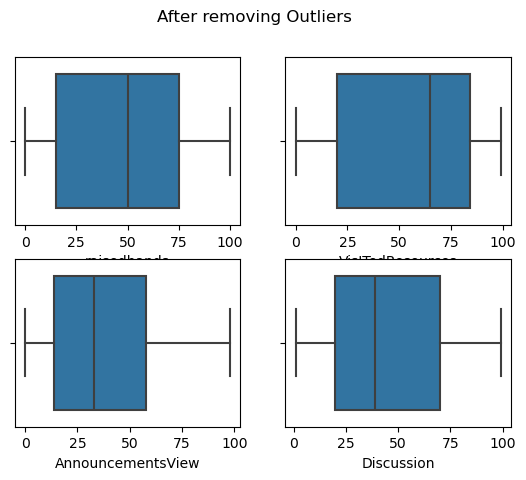

In [17]:
fig, axes = plt.subplots(2,2)
fig.suptitle('After removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
plt.show()

In [18]:
print('---------------- Data Skew Values before Yeo John Transformation ----------------------')

---------------- Data Skew Values before Yeo John Transformation ----------------------


In [19]:
print('raisedhands: ', df['raisedhands'].skew())

raisedhands:  0.028374079559687623


In [20]:
print('VisITedResources: ', df['VisITedResources'].skew())
print('AnnouncementsView: ', df['AnnouncementsView'].skew())
print('Discussion: ', df['Discussion'].skew())


VisITedResources:  -0.3388404568312024
AnnouncementsView:  0.4021955128761278
Discussion:  0.3621541732143617


C:\Users\rajka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Discussion', ylabel='Count'>

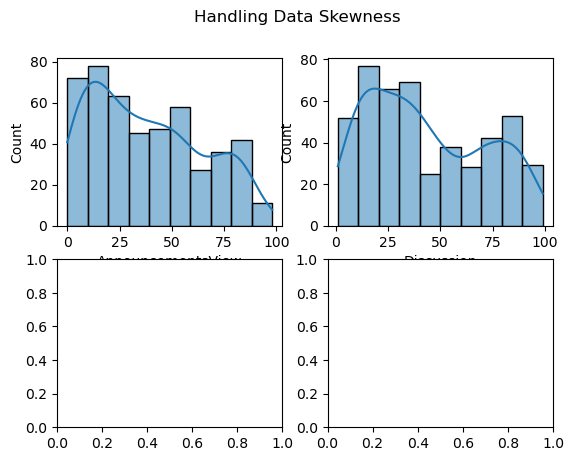

In [25]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Handling Data Skewness')
sns.histplot(ax = axes[0,0], data = df['AnnouncementsView'], kde=True)
sns.histplot(ax = axes[0,1], data = df['Discussion'], kde=True)

In [27]:
from sklearn.preprocessing import PowerTransformer
yeojohnTr = PowerTransformer(standardize=True)
df['AnnouncementsView'] = yeojohnTr.fit_transform(df['AnnouncementsView'].values.reshape(-1,1))
df['Discussion'] = yeojohnTr.fit_transform(df['Discussion'].values.reshape(-1,1))

In [28]:
print('---------------- Data Skew Values after Yeo John Transformation ----------------------')
print('AnnouncementsView: ', df['AnnouncementsView'].skew())
print('Discussion: ', df['Discussion'].skew())

---------------- Data Skew Values after Yeo John Transformation ----------------------
AnnouncementsView:  -0.1800377395845211
Discussion:  -0.13328782723929383


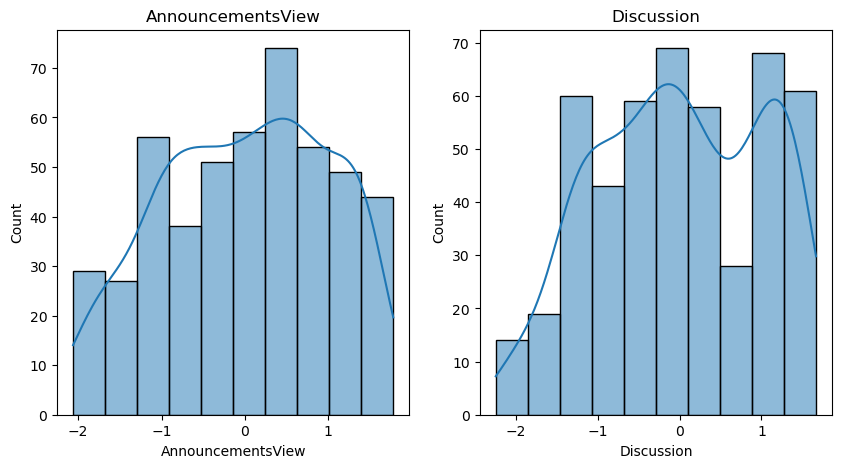

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Create a figure with 2x1 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the histogram for AnnouncementsView
sns.histplot(ax=axes[0], data=df['AnnouncementsView'], kde=True)
axes[0].set_title('AnnouncementsView')

# Plot the histogram for Discussion
sns.histplot(ax=axes[1], data=df['Discussion'], kde=True)
axes[1].set_title('Discussion')

# Show the plot
plt.show()